In [1]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
from sklearn.cluster import DBSCAN
from sklearn.impute import KNNImputer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

In [104]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data = pd.read_excel('data v2.xlsx')

,search_terms,wk 1,wk 2,wk 3,wk 4,wk 5,wk 6,wk 7,wk 8,wk 9,...,wk 53,wk 54,wk 55,wk 56,wk 57,wk 58,wk 59,wk 60,wk 61,wk 62
0,$1 gift cards,72848.0,57156.0,1099.0,71916.0,31700.0,65996.0,58028.0,60564.0,52239.0,...,39966.0,41614.0,38862.0,14572.0,15601.0,8917.0,9358.0,24340.0,21677.0,19287.0
1,$2 gift cards,8067.0,9288.0,4099.0,8258.0,5709.0,10616.0,5009.0,6197.0,7866.0,...,13640.0,11163.0,14303.0,8431.0,8099.0,4668.0,2701.0,4380.0,6482.0,8623.0
2,$5 gift cards,2914.0,7470.0,NaN,1202.0,12490.0,12119.0,14724.0,6245.0,1093.0,...,5944.0,4720.0,4810.0,2805.0,2037.0,1754.0,2054.0,3074.0,4556.0,6626.0
3,$5 gift cards,138572.0,198611.0,96669.0,22963.0,104178.0,125459.0,132591.0,100540.0,161350.0,...,116880.0,107120.0,93911.0,100258.0,1952778.0,1033274.0,1310199.0,1478926.0,2129291.0,1893435.0
4,kindle,9244.0,11096.0,9232.0,8208.0,7600.0,6944.0,4563.0,9776.0,8700.0,...,4989.0,4932.0,5125.0,5017.0,33613.0,15980.0,20172.0,27206.0,33821.0,24743.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15785,retirement decorations,11512.0,8245.0,12914.0,9970.0,12310.0,10472.0,10598.0,14704.0,20510.0,...,4831.0,5320.0,5721.0,6560.0,21675.0,18270.0,30718.0,21174.0,30416.0,35850.0
15786,retirement gift for women,17760.0,17916.0,19246.0,29612.0,13052.0,12334.0,17690.0,11806.0,41632.0,...,8172.0,8285.0,8355.0,11506.0,29772.0,23902.0,57171.0,17547.0,84238.0,110825.0
15787,retirement gifts for men,4562.0,4597.0,5007.0,13070.0,13518.0,8152.0,8538.0,10700.0,15074.0,...,4129.0,3632.0,3763.0,5170.0,13309.0,9453.0,20003.0,4305.0,2044.0,3551.0
15788,retractable baby gate,7652.0,13750.0,12949.0,14832.0,13820.0,10902.0,8427.0,16394.0,15428.0,...,11800.0,8807.0,8998.0,9438.0,66732.0,43177.0,53816.0,53899.0,66497.0,54400.0


In [63]:
data

,search_terms,wk 1,wk 2,wk 3,wk 4,wk 5,wk 6,wk 7,wk 8,wk 9,...,wk 53,wk 54,wk 55,wk 56,wk 57,wk 58,wk 59,wk 60,wk 61,wk 62
0,$1 gift cards,72848.0,57156.0,1099.0,71916.0,31700.0,65996.0,58028.0,60564.0,52239.0,...,39966.0,41614.0,38862.0,14572.0,15601.0,8917.0,9358.0,24340.0,21677.0,19287.0
1,$2 gift cards,8067.0,9288.0,4099.0,8258.0,5709.0,10616.0,5009.0,6197.0,7866.0,...,13640.0,11163.0,14303.0,8431.0,8099.0,4668.0,2701.0,4380.0,6482.0,8623.0
2,$5 gift cards,2914.0,7470.0,NaN,1202.0,12490.0,12119.0,14724.0,6245.0,1093.0,...,5944.0,4720.0,4810.0,2805.0,2037.0,1754.0,2054.0,3074.0,4556.0,6626.0
3,$5 gift cards,138572.0,198611.0,96669.0,22963.0,104178.0,125459.0,132591.0,100540.0,161350.0,...,116880.0,107120.0,93911.0,100258.0,1952778.0,1033274.0,1310199.0,1478926.0,2129291.0,1893435.0
4,kindle,9244.0,11096.0,9232.0,8208.0,7600.0,6944.0,4563.0,9776.0,8700.0,...,4989.0,4932.0,5125.0,5017.0,33613.0,15980.0,20172.0,27206.0,33821.0,24743.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15785,retirement decorations,11512.0,8245.0,12914.0,9970.0,12310.0,10472.0,10598.0,14704.0,20510.0,...,4831.0,5320.0,5721.0,6560.0,21675.0,18270.0,30718.0,21174.0,30416.0,35850.0
15786,retirement gift for women,17760.0,17916.0,19246.0,29612.0,13052.0,12334.0,17690.0,11806.0,41632.0,...,8172.0,8285.0,8355.0,11506.0,29772.0,23902.0,57171.0,17547.0,84238.0,110825.0
15787,retirement gifts for men,4562.0,4597.0,5007.0,13070.0,13518.0,8152.0,8538.0,10700.0,15074.0,...,4129.0,3632.0,3763.0,5170.0,13309.0,9453.0,20003.0,4305.0,2044.0,3551.0
15788,retractable baby gate,7652.0,13750.0,12949.0,14832.0,13820.0,10902.0,8427.0,16394.0,15428.0,...,11800.0,8807.0,8998.0,9438.0,66732.0,43177.0,53816.0,53899.0,66497.0,54400.0


In [82]:
df = data.iloc[:, 1:]

In [83]:
df

,wk 1,wk 2,wk 3,wk 4,wk 5,wk 6,wk 7,wk 8,wk 9,wk 10,...,wk 53,wk 54,wk 55,wk 56,wk 57,wk 58,wk 59,wk 60,wk 61,wk 62
0,72848.0,57156.0,1099.0,71916.0,31700.0,65996.0,58028.0,60564.0,52239.0,24323.0,...,39966.0,41614.0,38862.0,14572.0,15601.0,8917.0,9358.0,24340.0,21677.0,19287.0
1,8067.0,9288.0,4099.0,8258.0,5709.0,10616.0,5009.0,6197.0,7866.0,9278.0,...,13640.0,11163.0,14303.0,8431.0,8099.0,4668.0,2701.0,4380.0,6482.0,8623.0
2,2914.0,7470.0,NaN,1202.0,12490.0,12119.0,14724.0,6245.0,1093.0,12820.0,...,5944.0,4720.0,4810.0,2805.0,2037.0,1754.0,2054.0,3074.0,4556.0,6626.0
3,138572.0,198611.0,96669.0,22963.0,104178.0,125459.0,132591.0,100540.0,161350.0,218670.0,...,116880.0,107120.0,93911.0,100258.0,1952778.0,1033274.0,1310199.0,1478926.0,2129291.0,1893435.0
4,9244.0,11096.0,9232.0,8208.0,7600.0,6944.0,4563.0,9776.0,8700.0,11534.0,...,4989.0,4932.0,5125.0,5017.0,33613.0,15980.0,20172.0,27206.0,33821.0,24743.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15785,11512.0,8245.0,12914.0,9970.0,12310.0,10472.0,10598.0,14704.0,20510.0,19010.0,...,4831.0,5320.0,5721.0,6560.0,21675.0,18270.0,30718.0,21174.0,30416.0,35850.0
15786,17760.0,17916.0,19246.0,29612.0,13052.0,12334.0,17690.0,11806.0,41632.0,40318.0,...,8172.0,8285.0,8355.0,11506.0,29772.0,23902.0,57171.0,17547.0,84238.0,110825.0
15787,4562.0,4597.0,5007.0,13070.0,13518.0,8152.0,8538.0,10700.0,15074.0,5568.0,...,4129.0,3632.0,3763.0,5170.0,13309.0,9453.0,20003.0,4305.0,2044.0,3551.0
15788,7652.0,13750.0,12949.0,14832.0,13820.0,10902.0,8427.0,16394.0,15428.0,14223.0,...,11800.0,8807.0,8998.0,9438.0,66732.0,43177.0,53816.0,53899.0,66497.0,54400.0


In [84]:
def has_nulls(dataset):
    print("Dataset has nulls is ", dataset.isnull().values.any())

In [85]:
has_nulls(df)

Dataset has nulls is  True


In [86]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=1)
imputer.fit(df)
df = pd.DataFrame(imputer.transform(df))

In [87]:
has_nulls(df)

Dataset has nulls is  False


In [88]:
df.isnull().values.any()

False

In [89]:
df

,0,1,2,3,4,5,6,7,8,9,...,52,53,54,55,56,57,58,59,60,61
0,72848.0,57156.0,1099.0,71916.0,31700.0,65996.0,58028.0,60564.0,52239.0,24323.0,...,39966.0,41614.0,38862.0,14572.0,15601.0,8917.0,9358.0,24340.0,21677.0,19287.0
1,8067.0,9288.0,4099.0,8258.0,5709.0,10616.0,5009.0,6197.0,7866.0,9278.0,...,13640.0,11163.0,14303.0,8431.0,8099.0,4668.0,2701.0,4380.0,6482.0,8623.0
2,2914.0,7470.0,2450.0,1202.0,12490.0,12119.0,14724.0,6245.0,1093.0,12820.0,...,5944.0,4720.0,4810.0,2805.0,2037.0,1754.0,2054.0,3074.0,4556.0,6626.0
3,138572.0,198611.0,96669.0,22963.0,104178.0,125459.0,132591.0,100540.0,161350.0,218670.0,...,116880.0,107120.0,93911.0,100258.0,1952778.0,1033274.0,1310199.0,1478926.0,2129291.0,1893435.0
4,9244.0,11096.0,9232.0,8208.0,7600.0,6944.0,4563.0,9776.0,8700.0,11534.0,...,4989.0,4932.0,5125.0,5017.0,33613.0,15980.0,20172.0,27206.0,33821.0,24743.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15785,11512.0,8245.0,12914.0,9970.0,12310.0,10472.0,10598.0,14704.0,20510.0,19010.0,...,4831.0,5320.0,5721.0,6560.0,21675.0,18270.0,30718.0,21174.0,30416.0,35850.0
15786,17760.0,17916.0,19246.0,29612.0,13052.0,12334.0,17690.0,11806.0,41632.0,40318.0,...,8172.0,8285.0,8355.0,11506.0,29772.0,23902.0,57171.0,17547.0,84238.0,110825.0
15787,4562.0,4597.0,5007.0,13070.0,13518.0,8152.0,8538.0,10700.0,15074.0,5568.0,...,4129.0,3632.0,3763.0,5170.0,13309.0,9453.0,20003.0,4305.0,2044.0,3551.0
15788,7652.0,13750.0,12949.0,14832.0,13820.0,10902.0,8427.0,16394.0,15428.0,14223.0,...,11800.0,8807.0,8998.0,9438.0,66732.0,43177.0,53816.0,53899.0,66497.0,54400.0


In [92]:
def convert_data_anual(df):
    for i in range(0, 10):
        #df['wk '+ str(i)] = round((df['wk ' + str(i)]*2 + df['wk ' + str(int(i)+52)])/3, 2)
        #df[i] = round((df[i]*2 + df[i+52])/3, 2)
        df[i] = np.where(df[i] > df[i+52], df[i] , df[i+52])

    l = range(52, 62)
        
    #df.drop(columns = ['wk 53','wk 54','wk 55','wk 56','wk 57','wk 58','wk 59','wk 60','wk 61','wk 62'], inplace = True)
    df.drop(columns = l, inplace = True)
    return df

In [93]:
da = convert_data_anual(df)

In [94]:
da

,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,50,51
0,72848.0,57156.0,38862.0,71916.0,31700.0,65996.0,58028.0,60564.0,52239.0,24323.0,...,65689.0,27310.0,28338.0,26669.0,43789.0,24282.0,53120.0,40401.0,31224.0,57982.0
1,13640.0,11163.0,14303.0,8431.0,8099.0,10616.0,5009.0,6197.0,7866.0,9278.0,...,22970.0,11753.0,18398.0,14626.0,16863.0,17231.0,15723.0,13696.0,12411.0,16156.0
2,5944.0,7470.0,4810.0,2805.0,12490.0,12119.0,14724.0,6245.0,4556.0,12820.0,...,4708.0,4674.0,4548.0,4386.0,4743.0,5379.0,6069.0,5402.0,6422.0,6444.0
3,138572.0,198611.0,96669.0,100258.0,1952778.0,1033274.0,1310199.0,1478926.0,2129291.0,1893435.0,...,1223526.0,207662.0,144686.0,126712.0,126905.0,131232.0,126687.0,119196.0,138916.0,109153.0
4,9244.0,11096.0,9232.0,8208.0,33613.0,15980.0,20172.0,27206.0,33821.0,24743.0,...,8776.0,5497.0,7344.0,6591.0,6244.0,6495.0,6428.0,4725.0,4626.0,6037.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15785,11512.0,8245.0,12914.0,9970.0,21675.0,18270.0,30718.0,21174.0,30416.0,35850.0,...,2628.0,1974.0,3433.0,5554.0,5500.0,5548.0,4730.0,3601.0,4565.0,5297.0
15786,17760.0,17916.0,19246.0,29612.0,29772.0,23902.0,57171.0,17547.0,84238.0,110825.0,...,9356.0,3544.0,7341.0,8585.0,8315.0,10648.0,8671.0,7774.0,7428.0,9050.0
15787,4562.0,4597.0,5007.0,13070.0,13518.0,9453.0,20003.0,10700.0,15074.0,5568.0,...,7478.0,4091.0,3794.0,4335.0,4476.0,4903.0,4075.0,3715.0,3825.0,4539.0
15788,11800.0,13750.0,12949.0,14832.0,66732.0,43177.0,53816.0,53899.0,66497.0,54400.0,...,9302.0,7960.0,11350.0,10880.0,10732.0,10248.0,9096.0,14410.0,12062.0,12887.0


In [95]:
da['maximum week'] = da.idxmax(axis = 1)

In [98]:
da['maximum week'].unique()

array([ 0, 10,  6,  8,  4, 22,  1,  9, 17, 36, 27, 41, 39, 38, 15, 16,  7,
       44,  5, 24, 31, 32,  3, 51, 25, 11, 34, 33, 43, 21, 19, 12, 20, 35,
        2, 42, 23, 26, 48, 30, 28, 47, 29, 18, 49, 50, 37, 45, 13, 40, 46],
      dtype=int64)

In [100]:
da['max value'] = da.max(axis = 1)

In [101]:
X = da[['max value', 'maximum week']]

In [102]:
X

,max value,maximum week
0,72848.0,0
1,29733.0,10
2,14724.0,6
3,2129291.0,8
4,33821.0,8
...,...,...
15785,35850.0,9
15786,110825.0,9
15787,20003.0,6
15788,66732.0,4


In [105]:
input_data = X
input_data.head()

,max value,maximum week
0,72848.0,0
1,29733.0,10
2,14724.0,6
3,2129291.0,8
4,33821.0,8


In [131]:
x[:, 1]

array([ 0., 10.,  6., ...,  6.,  4.,  6.])

In [132]:
x[:, 0]

array([72848., 29733., 14724., ..., 20003., 66732., 21584.])

In [133]:
x[:, 2]

array([0., 0., 0., ..., 0., 0., 0.])

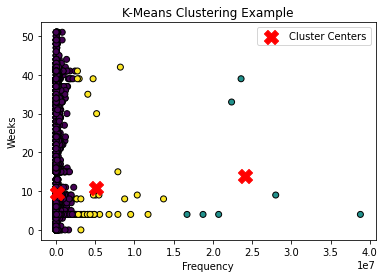

In [138]:
x = np.array(input_data)
kmeans = KMeans(n_clusters=3)
kmeans.fit(x)

# Get the cluster centers and labels
cluster_centers = kmeans.cluster_centers_
labels = kmeans.labels_

# Plot the data points and cluster centers
plt.scatter(x[:, 0], x[:, 1], c=labels, cmap='viridis', edgecolors='k')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='X', s=200, label='Cluster Centers')
plt.xlabel('Frequency')
plt.ylabel('Weeks')
plt.title('K-Means Clustering Example')
plt.legend()
plt.show()


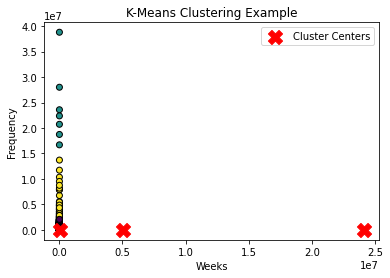

In [139]:
plt.scatter(x[:, 1], x[:, 0], c=labels, cmap='viridis', edgecolors='k')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='X', s=200, label='Cluster Centers')
plt.xlabel('Weeks')
plt.ylabel('Frequency')
plt.title('K-Means Clustering Example')
plt.legend()
plt.show()


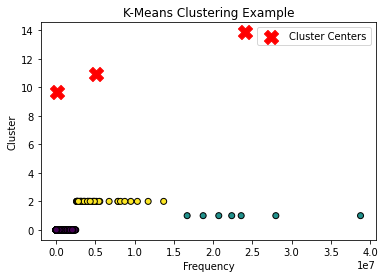

In [140]:
plt.scatter(x[:, 0], x[:, 2], c=labels, cmap='viridis', edgecolors='k')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='X', s=200, label='Cluster Centers')
plt.xlabel('Frequency')
plt.ylabel('Cluster')
plt.title('K-Means Clustering Example')
plt.legend()
plt.show()

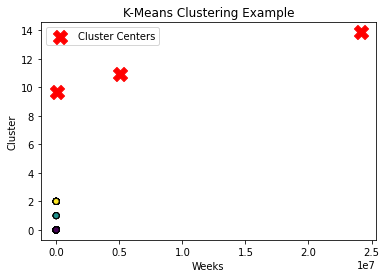

In [141]:
plt.scatter(x[:, 1], x[:, 2], c=labels, cmap='viridis', edgecolors='k')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='X', s=200, label='Cluster Centers')
plt.xlabel('Weeks')
plt.ylabel('Cluster')
plt.title('K-Means Clustering Example')
plt.legend()
plt.show()

In [107]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, random_state=1)
km.fit(x)
predict=km.predict(x)

In [118]:
pd.DataFrame(list(predict))

,0
0,0
1,0
2,0
3,0
4,0
...,...
15785,0
15786,0
15787,0
15788,0


In [121]:
input_data['predicted'] = pd.DataFrame(list(predict))

In [123]:
input_data['predicted'].unique()

array([0, 2, 1])

In [124]:
input_data['predicted'].value_counts()

predicted
0    15742
2       41
1        7
Name: count, dtype: int64

In [127]:
input_data[input_data['predicted'] == 0]['maximum week'].unique()

array([ 0, 10,  6,  8,  4, 22,  1,  9, 17, 36, 27, 41, 39, 38, 15, 16,  7,
       44,  5, 24, 31, 32,  3, 51, 25, 11, 34, 33, 43, 21, 19, 12, 20, 35,
        2, 42, 23, 26, 48, 30, 28, 47, 29, 18, 49, 50, 37, 45, 13, 40, 46],
      dtype=int64)

In [128]:
input_data[input_data['predicted'] == 1]['maximum week'].unique()

array([ 9, 39,  4, 33], dtype=int64)

In [129]:
input_data[input_data['predicted'] == 2]['maximum week'].unique()

array([ 4,  8, 39,  9, 15, 42, 30, 41,  0, 35], dtype=int64)

In [ ]:
x = np.array(input_data)
kmeans = KMeans(n_clusters=3)
kmeans.fit(x)

# Get the cluster centers and labels
cluster_centers = kmeans.cluster_centers_
labels = kmeans.labels_

# Plot the data points and cluster centers
plt.scatter(x[:, 0], x[:, 1], c=labels, cmap='viridis', edgecolors='k')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='X', s=200, label='Cluster Centers')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering Example')
plt.legend()
plt.show()

In [ ]:
km = KMeans(n_clusters=3, random_state=1)
km.fit(x)
predict=km.predict(x)

In [ ]:
input_data['predicted'] = pd.DataFrame(list(predict))

In [ ]:
input_data['predicted'].unique()

In [ ]:
input_data['predicted'].value_counts()

In [ ]:
input_data[input_data['predicted'] == 0]['maximum week'].unique()

In [ ]:
input_data[input_data['predicted'] == 1]['maximum week'].unique()

In [ ]:
input_data[input_data['predicted'] == 2]['maximum week'].unique()

In [48]:
def Cumilative_Percentage_Change(row):
    percentage_change = row.pct_change()
    cumulative_change_100s = ((1 + percentage_change).cumprod() - 1) * 100
    print(cumulative_change_100s)